In [65]:
pip install pywavelets

Unload all python modules, if you experience any issues.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pywt

### Load the data

This was generated in WaterbodyClustering.ipynb.

In [33]:
history = np.load('history_Mitchell-Coleman_full.npy')
times = np.load('time_axis_Mitchell-Coleman_full.npy').astype('datetime64[D]')
waterbodies = gpd.read_file('waterbodies_Mitchell-Coleman.geojson')

In [34]:
# data = scipy.ndimage.filters.gaussian_filter1d(history, sigma=7, axis=1)
data = history.copy()

In [35]:
data /= 100

In [36]:
grad = np.diff(data)

In [37]:
times_ = times[:-1]

In [38]:
mean = data.mean(axis=0)

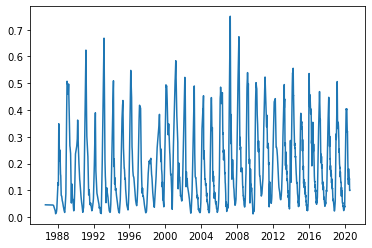

In [39]:
plt.figure()
plt.plot(times, mean)

In [129]:
# Modified from http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time.astype(int)[1] - time.astype(int)[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    return ax

In [136]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

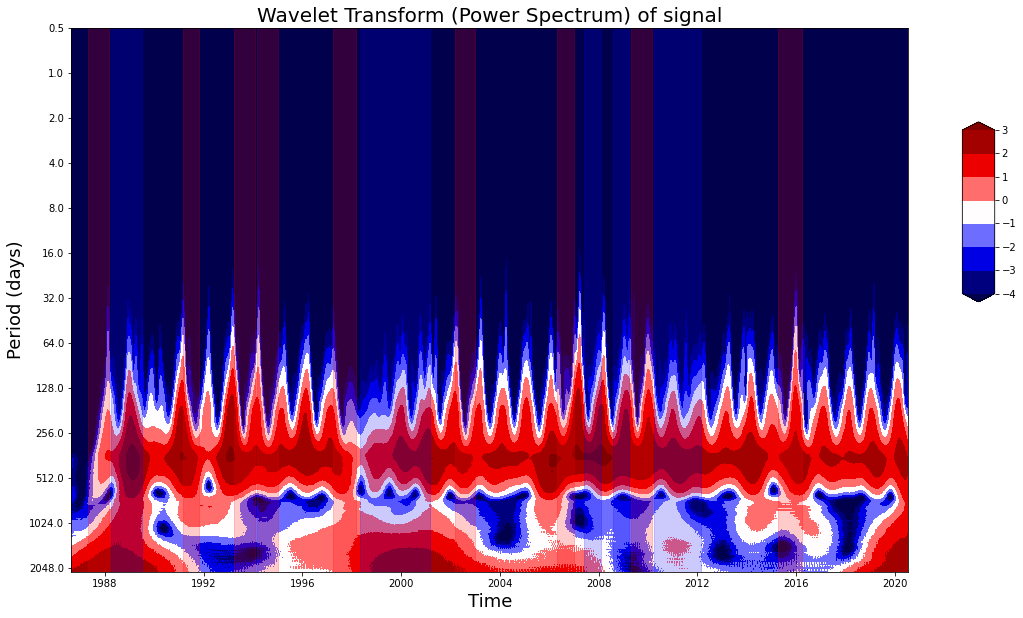

In [145]:
ax = plot_wavelet(times, mean, np.arange(0.1, 3 * 365, 10), ylabel='Period (days)', waveletname='fbsp')
def plot_la_nina_el_nino(ax):
    for la_nina_from, la_nina_to in [('2010-04', '2012-03'), ('2008-08', '2009-04'), ('2007-06', '2008-02'), ('1998-05', '2001-03'), ('1988-04', '1989-07')]:
        ax.axvspan(np.datetime64(la_nina_from), np.datetime64(la_nina_to), color='blue', alpha=0.2)
    for el_nino_from, el_nino_to in [('2015-04', '2016-04'), ('2009-05', '2010-03'), ('2006-05', '2007-01'), ('2002-03', '2003-01'), ('1997-04', '1998-03'),
                                     ('1994-03', '1995-01'), ('1993-04', '1994-02'), ('1991-03', '1991-11'), ('1987-05', '1988-03')]:
        ax.axvspan(np.datetime64(el_nino_from).astype('datetime64[D]'),
                    np.datetime64(el_nino_to).astype('datetime64[D]'), color='red', alpha=0.2)
plot_la_nina_el_nino(ax)

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  """Entry point for launching an IPython kernel.


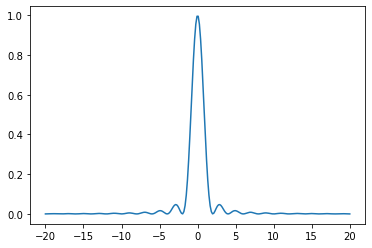

In [226]:
w = pywt.ContinuousWavelet('fbsp')
y, x = w.wavefun()
plt.plot(x, abs(y))

In [263]:
wavelet_decomp = pywt.wavedec(data, 'db2', axis=-1)

In [264]:
[h.shape for h in wavelet_decomp]

[(5974, 6),
 (5974, 6),
 (5974, 9),
 (5974, 15),
 (5974, 27),
 (5974, 51),
 (5974, 99),
 (5974, 196),
 (5974, 389),
 (5974, 776),
 (5974, 1550),
 (5974, 3098),
 (5974, 6193)]

In [265]:
wavelet_decomp[-1][:] = 0
wavelet_decomp[-2][:] = 0
wavelet_decomp[-3][:] = 0
wavelet_decomp[-4][:] = 0
wavelet_decomp[-5][:] = 0
wavelet_decomp[-6][:] = 0
wavelet_decomp[-7][:] = 0

In [267]:
recon = pywt.waverec(wavelet_decomp, 'db2', axis=-1)

(736330.0, 737060.0)

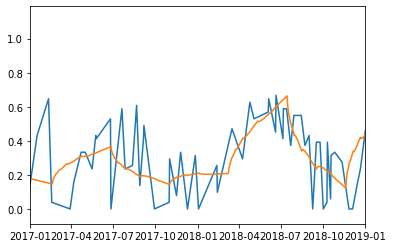

In [270]:
plt.plot(times, data[2])
plt.plot(times, recon[2])
plt.xlim(np.datetime64('2017'), np.datetime64('2019'))